# COVID-19 Global Analysis – Exploratory Data Analysis

This notebook performs an initial exploratory data analysis (EDA) on the OWID COVID-19 global dataset.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from pathlib import Path

ROOT_DIR = Path.cwd()

if not (ROOT_DIR / "src").is_dir():
    ROOT_DIR = ROOT_DIR.parent

print("ROOT_DIR:", ROOT_DIR)
print("Has src?:", (ROOT_DIR / "src").is_dir())

if str(ROOT_DIR) not in sys.path:
    sys.path.append(str(ROOT_DIR))

from src.eda import print_basic_info, compute_missing_ratios
from src.data_loading import load_covid_data

ROOT_DIR: c:\Users\tcdn\Desktop\Projects\11-covid19-global-analysis
Has src?: True


In [4]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams["axes.grid"] = True

In [8]:
df = load_covid_data()

print_basic_info(df)

missing_ratio = compute_missing_ratios(df)
missing_ratio.head(10)

Number of rows: 166,326
Number of columns: 67

Columns:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_

weekly_icu_admissions_per_million          0.967335
weekly_icu_admissions                      0.967335
excess_mortality_cumulative_per_million    0.965754
excess_mortality                           0.965754
excess_mortality_cumulative                0.965754
excess_mortality_cumulative_absolute       0.965754
weekly_hosp_admissions_per_million         0.934328
weekly_hosp_admissions                     0.934328
total_boosters                             0.894550
total_boosters_per_hundred                 0.894550
dtype: float64

In [ ]:
# Dataset overview

print_basic_info(df)

display(df.head())

numeric_summary = df.describe().T
display(numeric_summary.head(10))

unique_counts = {
    "iso_code": df["iso_code"].nunique(),
    "location": df["location"].nunique(),
    "continent": df["continent"].nunique(),
}

print("\nUnique values:")
for col, n_unique in unique_counts.items():
    print(f"- {col}: {n_unique} unique values")

Number of rows: 166,326
Number of columns: 67

Columns:
['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
total_cases,163293.0,2.536044e+06,1.543441e+07,1.000,2001.00000,26117.0000,298702.00000,4.451295e+08
new_cases,163133.0,1.157084e+04,8.442598e+04,0.000,1.00000,79.0000,1063.00000,4.206334e+06
new_cases_smoothed,161150.0,1.156560e+04,8.257830e+04,0.000,7.00000,107.1430,1146.00000,3.444237e+06
total_deaths,145451.0,5.766407e+04,3.021145e+05,1.000,79.00000,783.0000,7307.00000,5.995245e+06
new_deaths,145487.0,1.711373e+02,8.322513e+02,0.000,0.00000,2.0000,20.00000,1.802000e+04
new_deaths_smoothed,143390.0,1.726730e+02,8.170241e+02,0.000,0.14300,2.4290,21.28600,1.468914e+04
total_cases_per_million,162535.0,2.944776e+04,5.185238e+04,0.001,623.57900,4731.5210,37724.46600,7.065419e+05
new_cases_per_million,162375.0,1.664315e+02,6.830217e+02,0.000,0.04200,11.4390,101.28950,5.142749e+04
new_cases_smoothed_per_million,160398.0,1.655071e+02,5.321740e+02,0.000,1.63000,18.8290,120.85975,1.605261e+04
total_deaths_per_million,144706.0,5.093850e+02,7.845513e+02,0.000,18.58025,127.7375,711.95475,6.322263e+03



Unique values:
- iso_code: 238 unique values
- location: 238 unique values
- continent: 6 unique values


In [ ]:
# Missing values analysis

missing_ratio = compute_missing_ratios(df)

print("Top 15 columns by missing ratio:")
display(missing_ratio.head(15))

high_missing = missing_ratio[missing_ratio > 0.7]
print("\nColumns with more than 70% missing values:")
display(high_missing)

Top 15 columns by missing ratio:


weekly_icu_admissions_per_million          0.967335
weekly_icu_admissions                      0.967335
excess_mortality_cumulative_per_million    0.965754
excess_mortality                           0.965754
excess_mortality_cumulative                0.965754
excess_mortality_cumulative_absolute       0.965754
weekly_hosp_admissions_per_million         0.934328
weekly_hosp_admissions                     0.934328
total_boosters                             0.894550
total_boosters_per_hundred                 0.894550
icu_patients_per_million                   0.858934
icu_patients                               0.858934
hosp_patients                              0.851995
hosp_patients_per_million                  0.851995
new_vaccinations                           0.774858
dtype: float64


Columns with more than 70% missing values:


weekly_icu_admissions_per_million          0.967335
weekly_icu_admissions                      0.967335
excess_mortality_cumulative_per_million    0.965754
excess_mortality                           0.965754
excess_mortality_cumulative                0.965754
excess_mortality_cumulative_absolute       0.965754
weekly_hosp_admissions_per_million         0.934328
weekly_hosp_admissions                     0.934328
total_boosters                             0.894550
total_boosters_per_hundred                 0.894550
icu_patients_per_million                   0.858934
icu_patients                               0.858934
hosp_patients                              0.851995
hosp_patients_per_million                  0.851995
new_vaccinations                           0.774858
people_fully_vaccinated                    0.758059
people_fully_vaccinated_per_hundred        0.758059
people_vaccinated                          0.741550
people_vaccinated_per_hundred              0.741550
total_vaccin

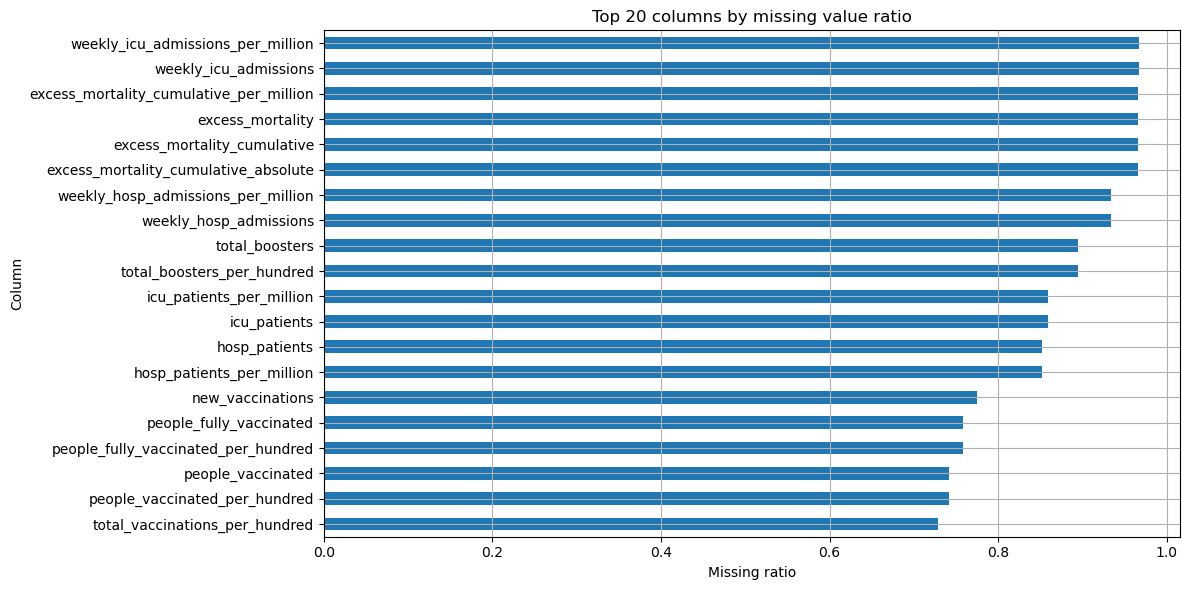

In [ ]:
# Plot missing value ratios for top 20 columns

top_n = 20
missing_top_n = missing_ratio.head(top_n)

plt.figure()
missing_top_n[::-1].plot(kind="barh")
plt.title(f"Top {top_n} columns by missing value ratio")
plt.xlabel("Missing ratio")
plt.ylabel("Column")
plt.tight_layout()
plt.show()

In [ ]:
# Time coverage

if not np.issubdtype(df["date"].dtype, np.datetime64):
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

global_min_date = df["date"].min()
global_max_date = df["date"].max()

print(f"Global date range: {global_min_date.date()} to {global_max_date.date()}")

df_world = df.loc[df["location"] == "World"].copy()
world_min_date = df_world["date"].min()
world_max_date = df_world["date"].max()

print(f"World rows date range: {world_min_date.date()} to {world_max_date.date()}")

Global date range: 2020-01-01 to 2022-03-05
World rows date range: 2020-01-22 to 2022-03-05


<Figure size 1200x600 with 0 Axes>

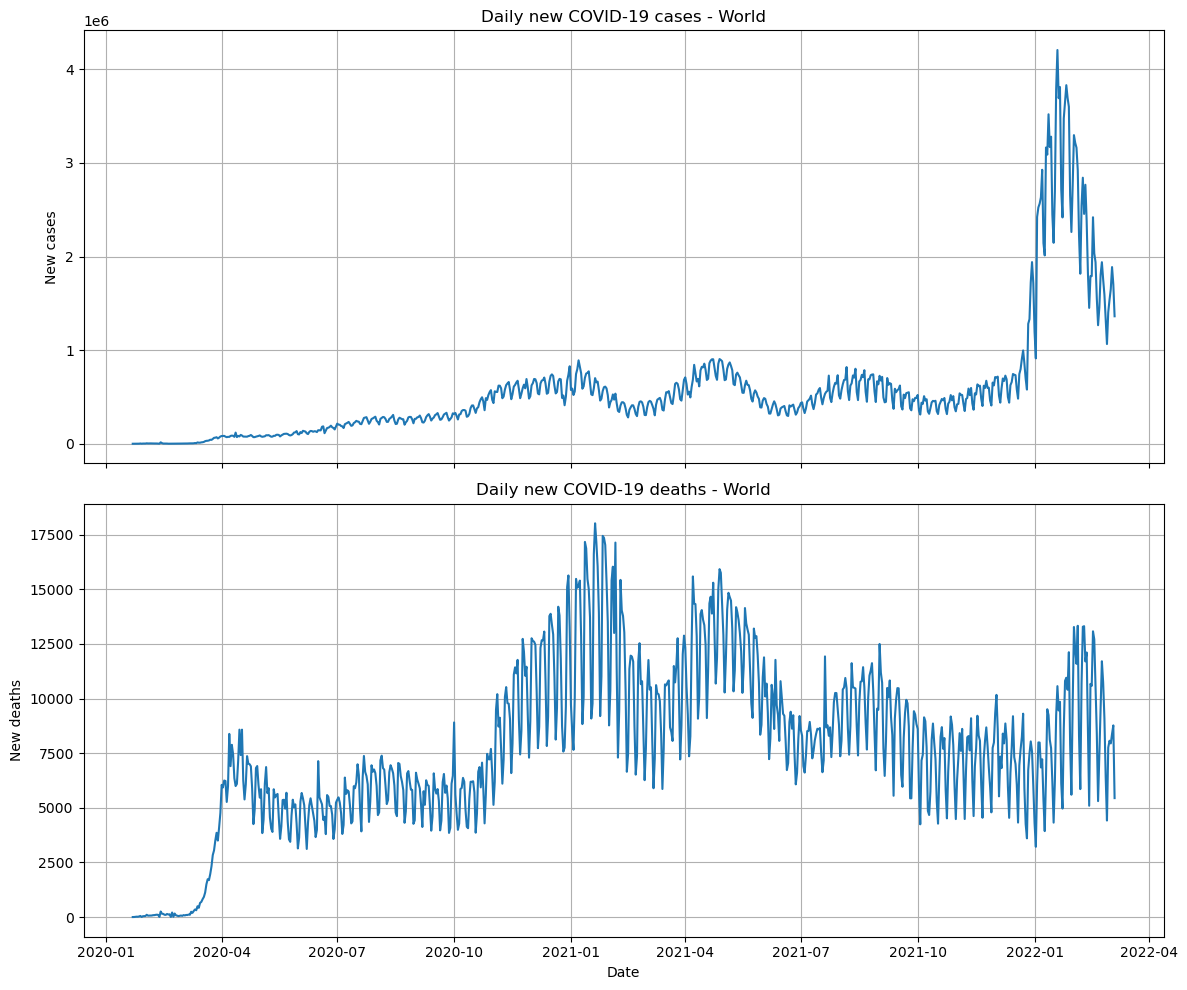

In [18]:
# Basic trends - World

df_world = df_world.sort_values("date")

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex= True)

axes[0].plot(df_world["date"], df_world["new_cases"])
axes[0].set_title("Daily new COVID-19 cases - World")
axes[0].set_ylabel("New cases")

axes[1].plot(df_world["date"], df_world["new_deaths"])
axes[1].set_title("Daily new COVID-19 deaths - World")
axes[1].set_ylabel("New deaths")
axes[1].set_xlabel("Date")

plt.tight_layout()
plt.show()

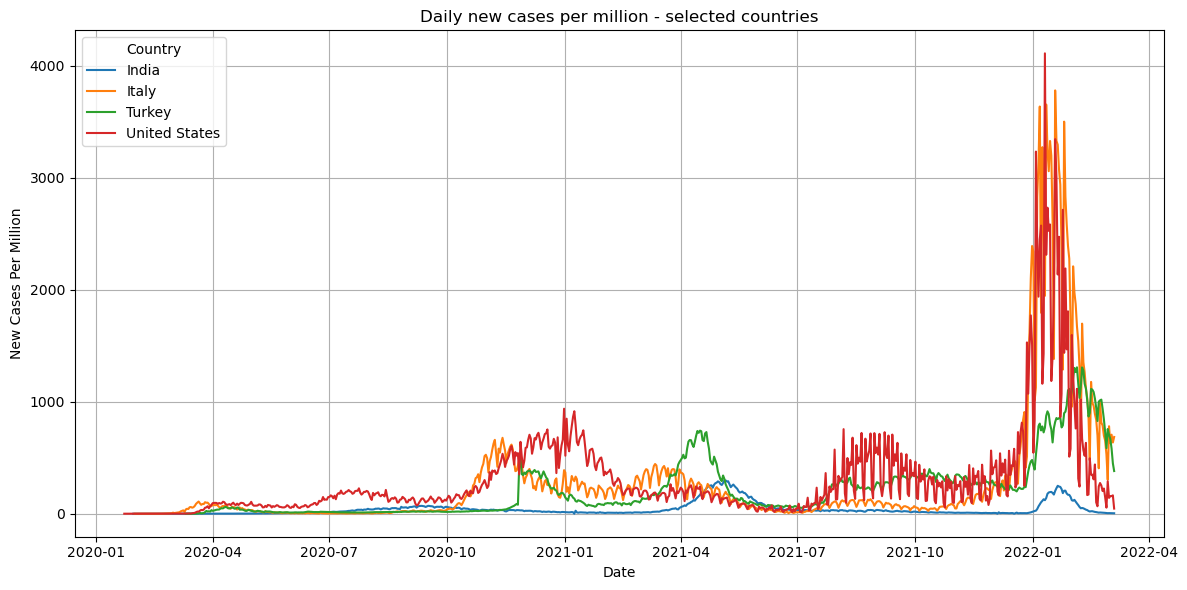

In [19]:
# Basic trends - Selected countries comparison

selected_countries = ["Italy", "Turkey", "United States", "India"]

df_countries = (
    df.loc[df["location"].isin(selected_countries)]
    .copy()
    .sort_values(["location", "date"])
)

# We will use cases per million to make countries more comparable
metric = "new_cases_per_million"
if metric not in df_countries.columns:
    metric = "new_cases"

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=df_countries,
    x="date",
    y=metric,
    hue="location",
)

plt.title(f"Daily {metric.replace('_', ' ')} - selected countries")
plt.xlabel("Date")
plt.ylabel(metric.replace("_", " ").title())
plt.legend(title="Country")
plt.tight_layout()
plt.show()

## Observations

- The dataset covers a wide range of dates from `2020-01` to `2022-04` (global scope).
- Some columns, especially excess mortality and ICU-related metrics, exhibit very high missing ratios.
- World-level new cases and deaths show multiple peaks corresponding to different waves of the pandemic.
- When comparing Italy, Turkey, the United States, and India, we can see distinct wave patterns and different magnitudes of cases per million.